In [6]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
# DO NOT USE in conjuection with pd.set_option('display.max_rows', 1000) 
dataV2_cohortV3



/tmp/ipykernel_105/2939944808.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

Proposal

1.Research introduction

In today’s rapidly evolving society, the distance between people is growing, to the point where some feel isolated due to difficulty in expressing themselves. This sense of isolation, often compounded by modern communication methods that lack genuine connection, has become an area of growing concern. My aim in this proposal is to investigate the factors associated with this experience of isolation and help raise awareness about social connection and people's mental health.

2.Variables

What really piques my interest is whether, in our fast-paced world dominated by social media, the simple acts of hugging, kissing, and physical intimacy can still truly convey emotions and help alleviate feelings of loneliness. In a time when so many of our interactions happen online, I want to explore how these direct forms of physical contact might make a difference in our emotional well-being. To dive deeper into this, I’ve chosen to focus on how often people hug, kiss, and engage in sexual activity over the past three months as the three key variables of my study. 

So the proposal is basically focus on three questions: 1: Is there a correlation between people’s hug frequency over three months and their frequency of feeling isolated? If there is, what kind of relationship it is?
2.Is there a correlation between people’s kiss frequency over three months and their frequency of feeling isolated? If there is, what kind of relationship it is?
3.Is there a correlation between people’s sex frequency over three months and their frequency of feeling isolated?  If there is, what kind of relationship it is?

In [13]:
dataV2_cohortV3[['CONNECTION_activities_hug_p3m','CONNECTION_activities_kissed_p3m','CONNECTION_activities_sex_p3m','LONELY_ucla_loneliness_scale_isolated']]

,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_isolated
19,Daily or almost daily,Daily or almost daily,A few times a month,Often
21,Daily or almost daily,Daily or almost daily,A few times a month,Some of the time
71,A few times a week,A few times a week,Not in the past three months,Some of the time
77,A few times a month,Daily or almost daily,Monthly,Some of the time
78,Daily or almost daily,Daily or almost daily,Monthly,Some of the time
...,...,...,...,...
11379,Not in the past three months,Not in the past three months,Not in the past three months,Often
11380,A few times a month,Not in the past three months,Not in the past three months,Some of the time
11412,Daily or almost daily,Daily or almost daily,Weekly,Some of the time
11428,A few times a month,Not in the past three months,Not in the past three months,Some of the time


I would like to create a box plot to show the relationship between the frequency of hugging in the past three months and the frequency of feeling isolated, since people's answers include different frequencies. Box plots are particularly useful for comparing distributions across multiple groups by placing them side by side. Additionally, the median line within the box allows for easy comparison of central tendencies across different groups, enabling us to make brief assumptions based on these tendencies. Moreover, box plots are efficient for large datasets, providing a clear picture without overwhelming the viewer with too much information. Apart from box plots, summary statistics also help. We can identify tendencies by calculating the mean value for different groups. However, because the isolation frequency data is categorical, we need to convert it to numerical data before creating a box plot.

I want to use the same visualization method for the other two variables, as these three variables are of the same type.

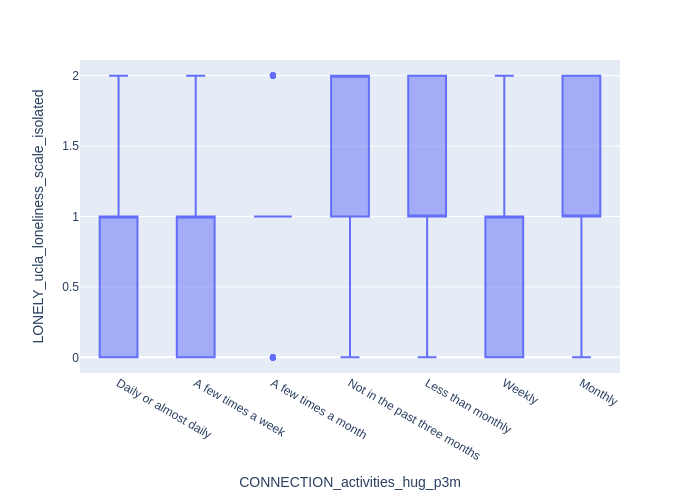

In [11]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dataV2_cohortV3)
df['LONELY_ucla_loneliness_scale_isolated'] = df['LONELY_ucla_loneliness_scale_isolated'].replace({'Hardly Ever':0,'Some of the time':1,'Often':2})
fig = px.box(
df,y = 'LONELY_ucla_loneliness_scale_isolated',
   x = 'CONNECTION_activities_hug_p3m',
   title='')
fig.show(renderer='png')

3. Analysis
To answer the question, “Is there a correlation between people’s hug frequency over three months and their frequency of feeling isolated?”, I will use linear regression analysis.

The frequency of hugs over three months is designated as the independent variable, while the frequency of feeling isolated is the dependent variable. Since both variables in linear regression must be numerical, we’ll convert the categorical data into numerical values by assigning a unique integer to each category.

Understanding the trends in the variables allows us to create a scatter plot with alpha transparency to visualize their relationship. We’ll then perform linear regression using Python, fitting a model to produce a regression line that represents the relationship.

After performing linear regression, we’ll evaluate the model’s performance by calculating the sample correlation coefficient,r. A positive 𝑟 indicates a positive relationship between hug frequency and isolation frequency, while a negative 𝑟 suggests a negative relationship. The magnitude of 𝑟 reveals the strength of the correlation:

0 to 0.3: Weak correlation
0.3 to 0.7: Moderate correlation
0.7 to 1: Strong correlation
This approach can also be applied to analyze the remaining two variables.

4. Hypothesis and result
I expect to see a strong negative correlation between people’s hug frequency and isolation frequency, kiss frequency and isolation frequency, and sex frequency and isolation frequency. This would suggest that a person’s degree of social isolation is inversely related to the frequency of their physical intimacy with others, such as hugging, kissing, and sexual contact. If this prediction holds true—that social isolation is related to a lack of physical contact—then we can hypothesize medically that a long-term lack of intimate contact may be one of the factors contributing to social isolation. Medical researchers could investigate this relationship further and potentially develop effective treatments. Furthermore, people might be able to reduce their risk of feeling isolated by interacting more frequently with friends, romantic partners, or family members.
